    SIMULACIÓN MOLECULAR 3D: AGUA + SAL
    H₂O + NaCl → Na⁺(aq) + Cl⁻(aq)

🧂 Configuración de la simulación:
   • Moléculas de agua (H₂O): 100
   • Iones de sodio (Na⁺): 15
   • Iones de cloruro (Cl⁻): 15
   • Tamaño del contenedor: 40 Å
   • Total de partículas: 130

📊 Mostrando visualización estática...


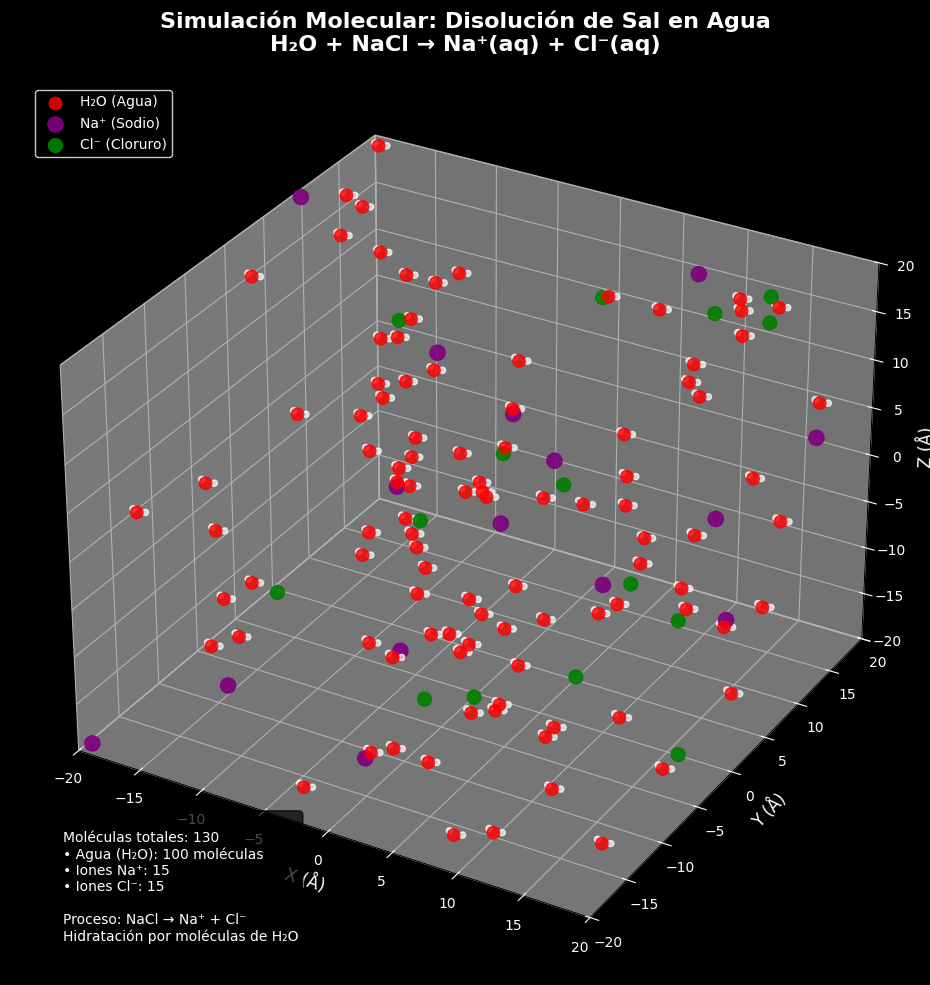


✅ Simulación completada!


🎯 ¡Simulación molecular completada!
   Las moléculas de agua rodean a los iones disueltos,
   simulando el proceso real de disolución salina.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches

class MolecularSimulation:
    def __init__(self, container_size=30, num_water=120, num_salt_pairs=20):
        self.container_size = container_size
        self.num_water = num_water
        self.num_salt_pairs = num_salt_pairs
        
        # Configurar la figura
        self.fig = plt.figure(figsize=(14, 10))
        self.fig.patch.set_facecolor('black')
        
        # Crear subplot principal
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.ax.set_facecolor('black')
        
        # Generar moléculas
        self.generate_molecules()
        
        # Configurar la visualización
        self.setup_plot()
        
    def generate_molecules(self):
        """Genera las posiciones y velocidades de todas las moléculas"""
        
        # Moléculas de agua (H2O)
        self.water_positions = []
        self.water_velocities = []
        
        for _ in range(self.num_water):
            # Posición aleatoria dentro del contenedor
            pos = np.array([
                random.uniform(-self.container_size/2, self.container_size/2),
                random.uniform(-self.container_size/2, self.container_size/2),
                random.uniform(-self.container_size/2, self.container_size/2)
            ])
            
            # Velocidad aleatoria pequeña (movimiento browniano)
            vel = np.array([
                random.uniform(-0.3, 0.3),
                random.uniform(-0.3, 0.3),
                random.uniform(-0.3, 0.3)
            ])
            
            self.water_positions.append(pos)
            self.water_velocities.append(vel)
        
        # Iones de sodio (Na+)
        self.sodium_positions = []
        self.sodium_velocities = []
        
        for _ in range(self.num_salt_pairs):
            pos = np.array([
                random.uniform(-self.container_size/2, self.container_size/2),
                random.uniform(-self.container_size/2, self.container_size/2),
                random.uniform(-self.container_size/2, self.container_size/2)
            ])
            
            vel = np.array([
                random.uniform(-0.25, 0.25),
                random.uniform(-0.25, 0.25),
                random.uniform(-0.25, 0.25)
            ])
            
            self.sodium_positions.append(pos)
            self.sodium_velocities.append(vel)
        
        # Iones de cloruro (Cl-)
        self.chloride_positions = []
        self.chloride_velocities = []
        
        for _ in range(self.num_salt_pairs):
            pos = np.array([
                random.uniform(-self.container_size/2, self.container_size/2),
                random.uniform(-self.container_size/2, self.container_size/2),
                random.uniform(-self.container_size/2, self.container_size/2)
            ])
            
            vel = np.array([
                random.uniform(-0.25, 0.25),
                random.uniform(-0.25, 0.25),
                random.uniform(-0.25, 0.25)
            ])
            
            self.chloride_positions.append(pos)
            self.chloride_velocities.append(vel)
    
    def setup_plot(self):
        """Configura la visualización 3D"""
        
        # Límites del gráfico
        limit = self.container_size / 2
        self.ax.set_xlim([-limit, limit])
        self.ax.set_ylim([-limit, limit])
        self.ax.set_zlim([-limit, limit])
        
        # Etiquetas y título
        self.ax.set_xlabel('X (Å)', color='white', fontsize=12)
        self.ax.set_ylabel('Y (Å)', color='white', fontsize=12)
        self.ax.set_zlabel('Z (Å)', color='white', fontsize=12)
        
        # Configurar colores de los ejes
        self.ax.xaxis.label.set_color('white')
        self.ax.yaxis.label.set_color('white')
        self.ax.zaxis.label.set_color('white')
        self.ax.tick_params(colors='white')
        
        # Crear grid transparente
        self.ax.grid(True, alpha=0.3)
        
        # Título principal
        self.fig.suptitle('Simulación Molecular: Disolución de Sal en Agua\nH₂O + NaCl → Na⁺(aq) + Cl⁻(aq)', 
                         fontsize=16, color='white', fontweight='bold')
    
    def plot_static(self):
        """Crea una visualización estática de las moléculas"""
        
        # Limpiar el gráfico
        self.ax.clear()
        self.setup_plot()
        
        # Plotear moléculas de agua (puntos rojos)
        water_x = [pos[0] for pos in self.water_positions]
        water_y = [pos[1] for pos in self.water_positions]
        water_z = [pos[2] for pos in self.water_positions]
        
        # Moléculas de agua con forma de "V" simulada
        water_scatter = self.ax.scatter(water_x, water_y, water_z, 
                                      c='red', s=80, alpha=0.8, 
                                      marker='o', label='H₂O (Agua)')
        
        # Añadir pequeños puntos blancos cerca de cada molécula de agua (hidrógenos)
        for i, pos in enumerate(self.water_positions):
            # Simular posiciones de hidrógenos
            h1_pos = pos + np.array([0.5, 0.3, 0])
            h2_pos = pos + np.array([-0.5, 0.3, 0])
            
            self.ax.scatter([h1_pos[0], h2_pos[0]], 
                          [h1_pos[1], h2_pos[1]], 
                          [h1_pos[2], h2_pos[2]], 
                          c='white', s=20, alpha=0.7, marker='o')
        
        # Plotear iones de sodio (puntos morados)
        sodium_x = [pos[0] for pos in self.sodium_positions]
        sodium_y = [pos[1] for pos in self.sodium_positions]
        sodium_z = [pos[2] for pos in self.sodium_positions]
        
        self.ax.scatter(sodium_x, sodium_y, sodium_z, 
                       c='purple', s=120, alpha=0.9, 
                       marker='o', label='Na⁺ (Sodio)')
        
        # Plotear iones de cloruro (puntos verdes)
        chloride_x = [pos[0] for pos in self.chloride_positions]
        chloride_y = [pos[1] for pos in self.chloride_positions]
        chloride_z = [pos[2] for pos in self.chloride_positions]
        
        self.ax.scatter(chloride_x, chloride_y, chloride_z, 
                       c='green', s=100, alpha=0.9, 
                       marker='o', label='Cl⁻ (Cloruro)')
        
        # Añadir leyenda
        self.ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), 
                      facecolor='black', edgecolor='white', 
                      labelcolor='white', fontsize=10)
        
        # Información adicional
        info_text = f"""
        Moléculas totales: {self.num_water + 2*self.num_salt_pairs}
        • Agua (H₂O): {self.num_water} moléculas
        • Iones Na⁺: {self.num_salt_pairs}
        • Iones Cl⁻: {self.num_salt_pairs}
        
        Proceso: NaCl → Na⁺ + Cl⁻
        Hidratación por moléculas de H₂O
        """
        
        self.ax.text2D(0.02, 0.02, info_text, transform=self.ax.transAxes, 
                      fontsize=10, color='white', 
                      bbox=dict(boxstyle="round,pad=0.3", facecolor='black', alpha=0.7))
        
        plt.tight_layout()
        plt.show()
    
    def update_positions(self):
        """Actualiza las posiciones de las moléculas (movimiento browniano)"""
        
        # Actualizar agua
        for i in range(len(self.water_positions)):
            self.water_positions[i] += self.water_velocities[i]
            
            # Rebote en las paredes
            for j in range(3):
                if abs(self.water_positions[i][j]) > self.container_size/2:
                    self.water_velocities[i][j] *= -1
                    self.water_positions[i][j] = np.sign(self.water_positions[i][j]) * self.container_size/2
        
        # Actualizar sodio
        for i in range(len(self.sodium_positions)):
            self.sodium_positions[i] += self.sodium_velocities[i]
            
            for j in range(3):
                if abs(self.sodium_positions[i][j]) > self.container_size/2:
                    self.sodium_velocities[i][j] *= -1
                    self.sodium_positions[i][j] = np.sign(self.sodium_positions[i][j]) * self.container_size/2
        
        # Actualizar cloruro
        for i in range(len(self.chloride_positions)):
            self.chloride_positions[i] += self.chloride_velocities[i]
            
            for j in range(3):
                if abs(self.chloride_positions[i][j]) > self.container_size/2:
                    self.chloride_velocities[i][j] *= -1
                    self.chloride_positions[i][j] = np.sign(self.chloride_positions[i][j]) * self.container_size/2
    
    def animate(self, frame):
        """Función de animación para FuncAnimation"""
        
        # Actualizar posiciones
        self.update_positions()
        
        # Limpiar y redibujar
        self.ax.clear()
        self.setup_plot()
        
        # Plotear todas las moléculas
        # Agua
        water_x = [pos[0] for pos in self.water_positions]
        water_y = [pos[1] for pos in self.water_positions]
        water_z = [pos[2] for pos in self.water_positions]
        
        self.ax.scatter(water_x, water_y, water_z, 
                       c='red', s=80, alpha=0.8, marker='o')
        
        # Hidrógenos
        for pos in self.water_positions:
            h1_pos = pos + np.array([0.5, 0.3, 0])
            h2_pos = pos + np.array([-0.5, 0.3, 0])
            self.ax.scatter([h1_pos[0], h2_pos[0]], 
                          [h1_pos[1], h2_pos[1]], 
                          [h1_pos[2], h2_pos[2]], 
                          c='white', s=20, alpha=0.7, marker='o')
        
        # Sodio
        sodium_x = [pos[0] for pos in self.sodium_positions]
        sodium_y = [pos[1] for pos in self.sodium_positions]
        sodium_z = [pos[2] for pos in self.sodium_positions]
        
        self.ax.scatter(sodium_x, sodium_y, sodium_z, 
                       c='purple', s=120, alpha=0.9, marker='o')
        
        # Cloruro
        chloride_x = [pos[0] for pos in self.chloride_positions]
        chloride_y = [pos[1] for pos in self.chloride_positions]
        chloride_z = [pos[2] for pos in self.chloride_positions]
        
        self.ax.scatter(chloride_x, chloride_y, chloride_z, 
                       c='green', s=100, alpha=0.9, marker='o')
        
        # Rotar la vista ligeramente
        self.ax.view_init(elev=20, azim=frame*2)
        
        return self.ax.artists
    
    def run_animation(self, duration=10, fps=30):
        """Ejecuta la animación"""
        
        frames = duration * fps
        ani = FuncAnimation(self.fig, self.animate, frames=frames, 
                          interval=1000//fps, blit=False, repeat=True)
        
        plt.show()
        return ani

# Función de demostración completa
def demo_molecular_simulation():
    """Demostración completa de la simulación molecular"""
    
    print("="*70)
    print("    SIMULACIÓN MOLECULAR 3D: AGUA + SAL")
    print("    H₂O + NaCl → Na⁺(aq) + Cl⁻(aq)")
    print("="*70)
    
    # Crear la simulación
    sim = MolecularSimulation(container_size=40, num_water=100, num_salt_pairs=15)
    
    print("\n🧂 Configuración de la simulación:")
    print(f"   • Moléculas de agua (H₂O): {sim.num_water}")
    print(f"   • Iones de sodio (Na⁺): {sim.num_salt_pairs}")
    print(f"   • Iones de cloruro (Cl⁻): {sim.num_salt_pairs}")
    print(f"   • Tamaño del contenedor: {sim.container_size} Å")
    print(f"   • Total de partículas: {sim.num_water + 2*sim.num_salt_pairs}")
    
    print("\n📊 Mostrando visualización estática...")
    sim.plot_static()
    
    # Opción para animación
    response = input("\n¿Deseas ver la animación? (s/n): ").lower()
    if response == 's' or response == 'si':
        print("\n🎬 Iniciando animación...")
        print("   (Cierra la ventana para terminar)")
        ani = sim.run_animation(duration=15, fps=20)
    
    print("\n✅ Simulación completada!")
    
    return sim

# Función alternativa para crear múltiples vistas
def create_multiple_views():
    """Crea múltiples vistas de la simulación"""
    
    sim = MolecularSimulation(container_size=35, num_water=80, num_salt_pairs=12)
    
    # Crear figura con múltiples subplots
    fig = plt.figure(figsize=(15, 5))
    fig.patch.set_facecolor('black')
    
    # Vista 1: XY
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.view_init(elev=90, azim=0)
    ax1.set_title('Vista XY (desde arriba)', color='white', fontsize=12)
    
    # Vista 2: XZ
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.view_init(elev=0, azim=0)
    ax2.set_title('Vista XZ (lateral)', color='white', fontsize=12)
    
    # Vista 3: Isométrica
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.view_init(elev=20, azim=45)
    ax3.set_title('Vista Isométrica', color='white', fontsize=12)
    
    axes = [ax1, ax2, ax3]
    
    for ax in axes:
        ax.set_facecolor('black')
        limit = sim.container_size / 2
        ax.set_xlim([-limit, limit])
        ax.set_ylim([-limit, limit])
        ax.set_zlim([-limit, limit])
        ax.tick_params(colors='white')
        
        # Plotear moléculas
        # Agua
        water_x = [pos[0] for pos in sim.water_positions]
        water_y = [pos[1] for pos in sim.water_positions]
        water_z = [pos[2] for pos in sim.water_positions]
        ax.scatter(water_x, water_y, water_z, c='red', s=60, alpha=0.8)
        
        # Sodio
        sodium_x = [pos[0] for pos in sim.sodium_positions]
        sodium_y = [pos[1] for pos in sim.sodium_positions]
        sodium_z = [pos[2] for pos in sim.sodium_positions]
        ax.scatter(sodium_x, sodium_y, sodium_z, c='purple', s=100, alpha=0.9)
        
        # Cloruro
        chloride_x = [pos[0] for pos in sim.chloride_positions]
        chloride_y = [pos[1] for pos in sim.chloride_positions]
        chloride_z = [pos[2] for pos in sim.chloride_positions]
        ax.scatter(chloride_x, chloride_y, chloride_z, c='green', s=80, alpha=0.9)
    
    plt.suptitle('Simulación Molecular: Múltiples Vistas\nH₂O + NaCl → Na⁺(aq) + Cl⁻(aq)', 
                 fontsize=14, color='white', fontweight='bold')
    plt.tight_layout()
    plt.show()

# Ejecutar la demostración
if __name__ == "__main__":
    # Opción 1: Simulación completa con animación
    demo_molecular_simulation()
    
    # Opción 2: Vistas múltiples
    print("\n" + "="*50)
    response = input("¿Deseas ver las vistas múltiples? (s/n): ").lower()
    if response == 's' or response == 'si':
        create_multiple_views()
    
    print("\n🎯 ¡Simulación molecular completada!")
    print("   Las moléculas de agua rodean a los iones disueltos,")
    print("   simulando el proceso real de disolución salina.")

Creando el sistema de agua...
Sistema creado con 774 átomos de agua
Minimizando energía...
Equilibrando...
Simulando...
#"Step","Potential Energy (kJ/mole)","Temperature (K)","Box Volume (nm^3)","Density (g/mL)"
5500,-10505.49913420061,294.1210709068798,7.789888408631104,0.9907855051396423
6000,-10560.191538223138,295.25553438283373,7.586148379445091,1.0173948802319068
6500,-10312.331626648855,306.2641238544231,7.767071342580029,0.9936961026243448
7000,-10170.605381659392,291.0360143886934,7.832747860513636,0.9853640969136078
7500,-10243.001524081279,291.03222005749143,7.932427509687855,0.9729819166328219
8000,-10245.680089418995,300.1674126027568,8.00464719254526,0.9642034603492454
8500,-10201.481758039517,294.54863138930904,7.856851816438165,0.9823411084041482
9000,-10202.222190726941,306.1021700821278,7.85776670400057,0.9822267334556453
9500,-10226.109322524717,300.466145220233,7.936304022073783,0.9725066605891246
10000,-10354.911223263654,304.8078655428507,7.7626480812207115,0.9942

C:\Users\Alejandro Zarco\AppData\Local\Temp\ipykernel_18252\666287251.py:384: UserWarning:

Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.

C:\Users\Alejandro Zarco\AppData\Local\Temp\ipykernel_18252\666287251.py:384: UserWarning:

Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.



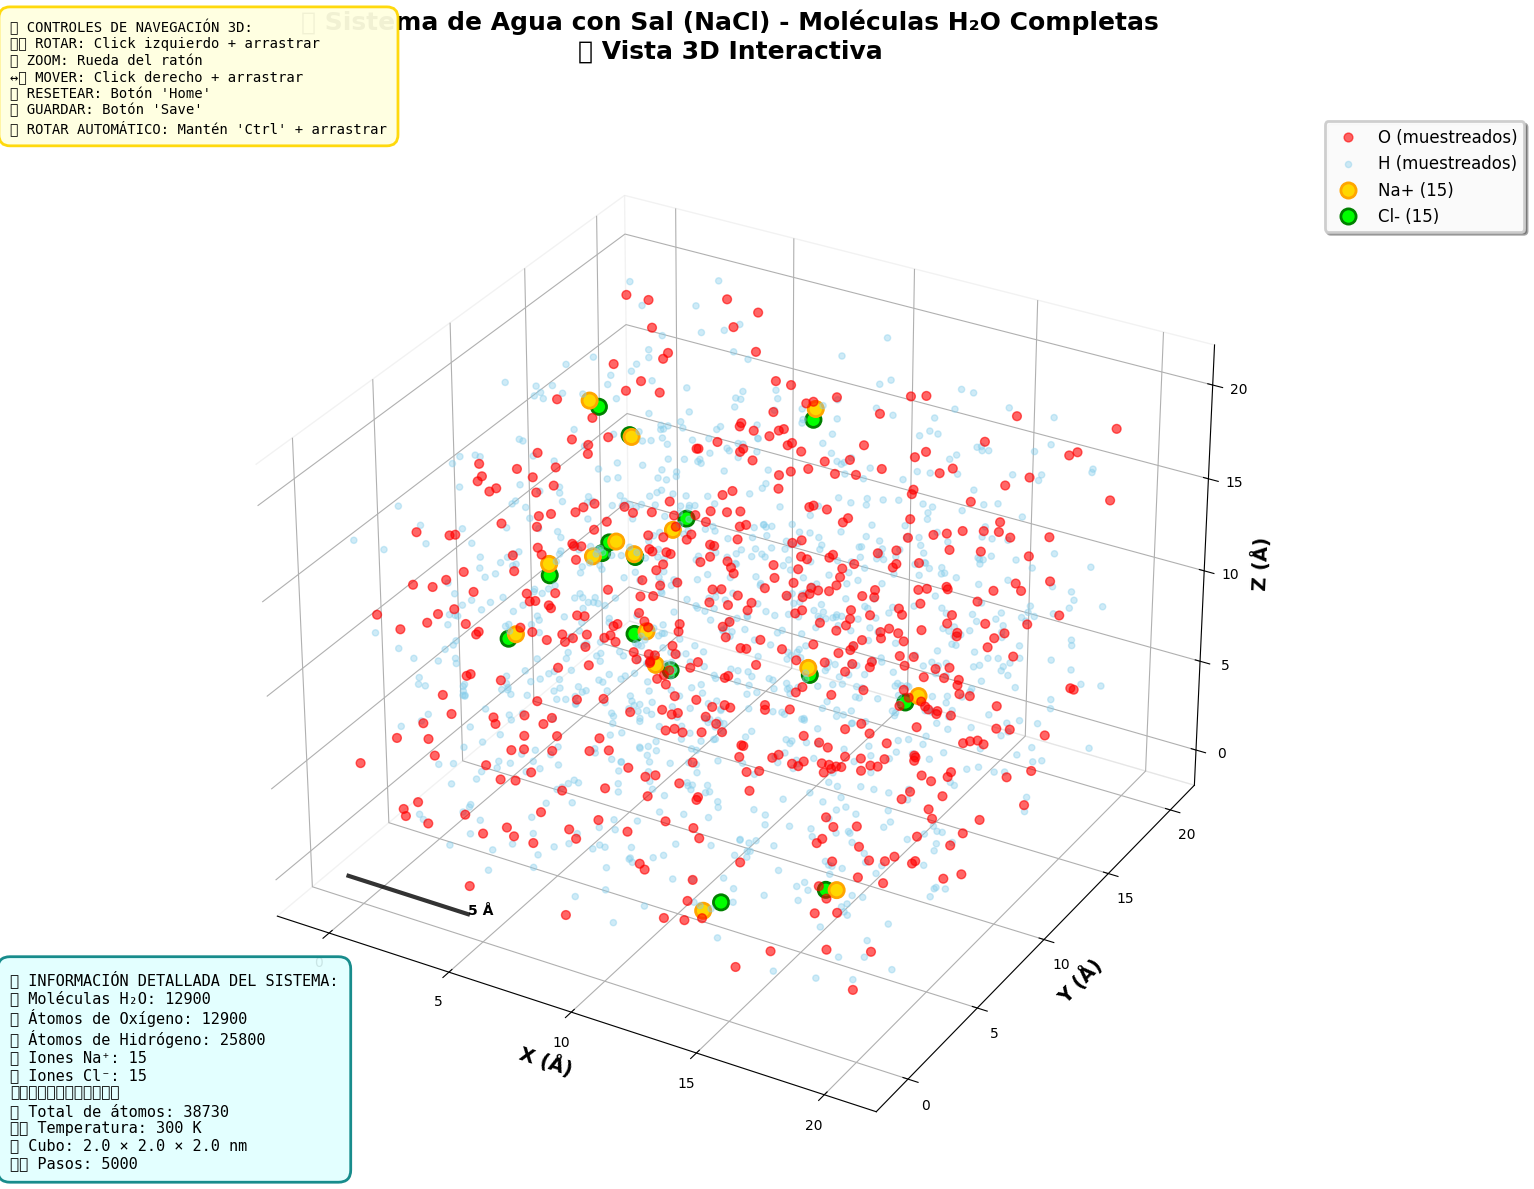

✅ Visualización creada exitosamente!
👆 Usa los controles del mouse para explorar el sistema en 3D

2️⃣ Visualización de agua pura (simulación real):

🎨 Creando visualización 3D interactiva...


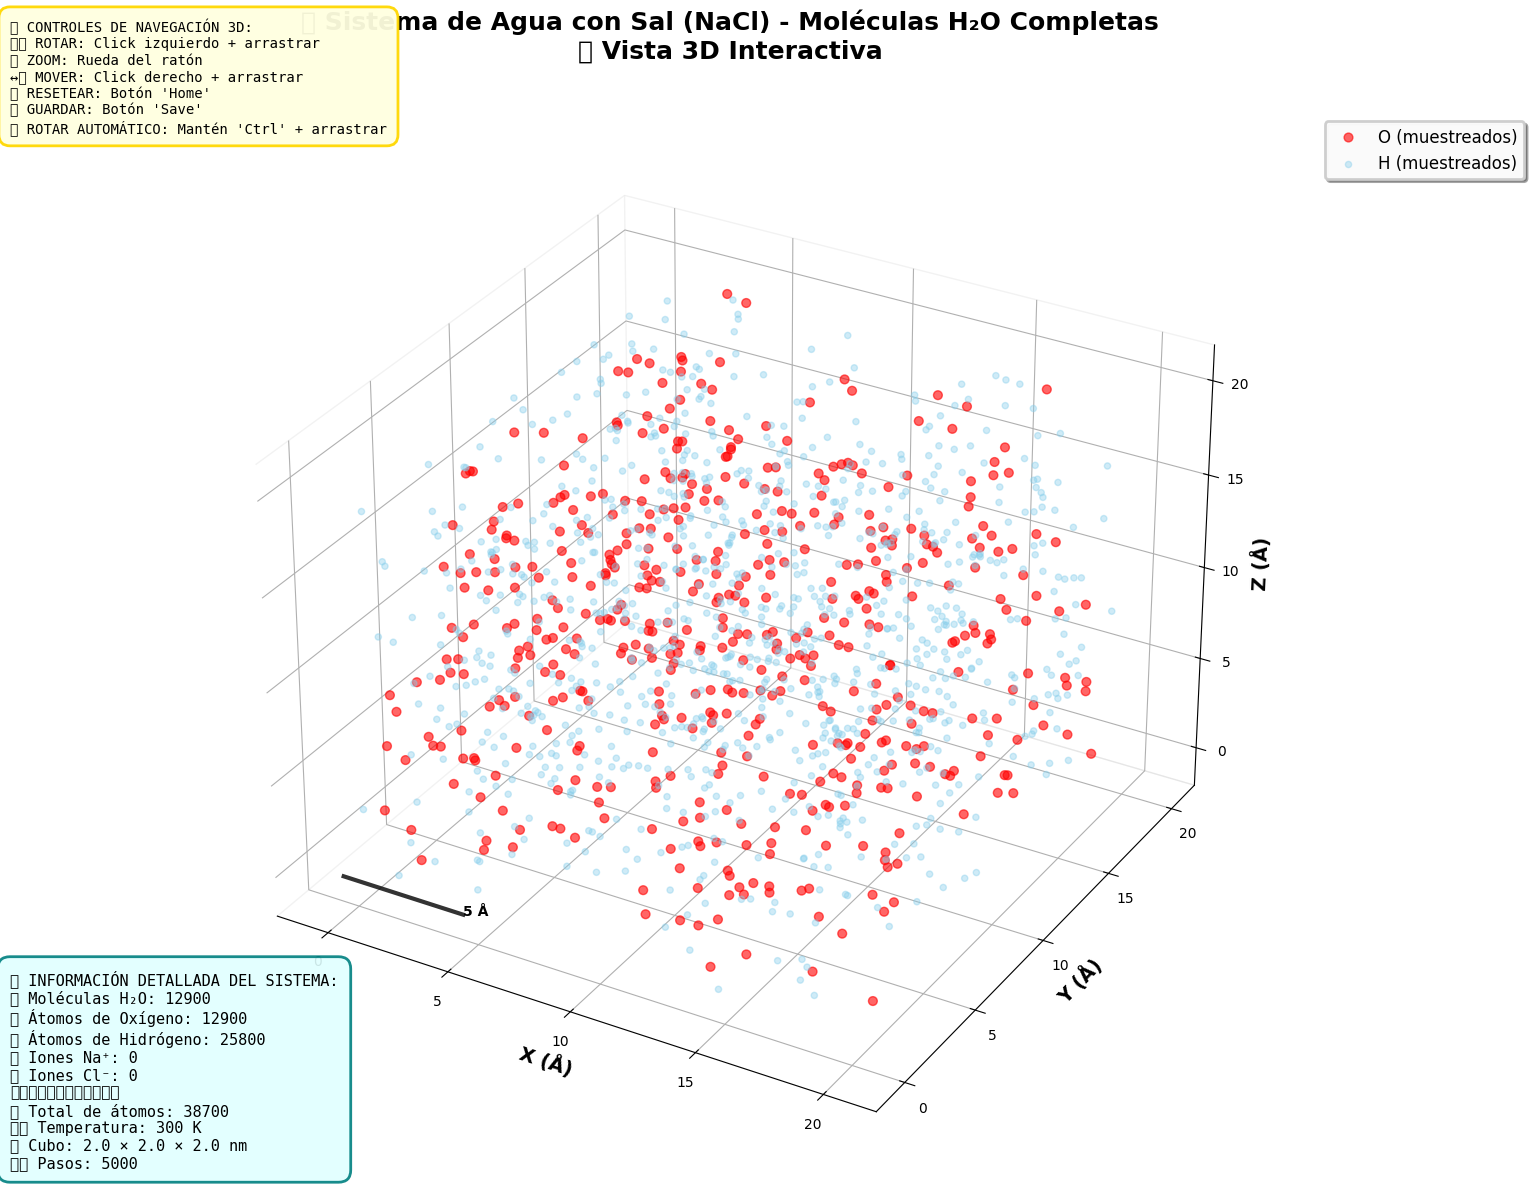

✅ Visualización creada exitosamente!
👆 Usa los controles del mouse para explorar el sistema en 3D

3️⃣ Análisis de trayectoria:

🎉 ¡SIMULACIÓN Y VISUALIZACIÓN COMPLETADAS!

📋 RESUMEN:
• Simulación de agua: ✅ Completada (5000 pasos)
• Archivo PDB original: ✅ water_output.pdb
• Archivo optimizado: ✅ water_with_salt_visual.pdb
• Trayectoria DCD: ✅ water_trajectory.dcd
• Moléculas H₂O mostradas: ✅ ~200 (muestreadas)
• Iones Na⁺/Cl⁻: ✅ 25 pares visibles
• Controles 3D: ✅ Totalmente interactivos

🎮 ¡Usa el mouse para navegar en 3D y explorar tu sistema!


In [22]:
from openmm.app import *
from openmm import *
from openmm.unit import *
from sys import stdout
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# =============================================
# 1. Definir parámetros del sistema
# =============================================
size = 2.0  # Tamaño del cubo (en nm) - Reducido para menos moléculas
temperature = 300 * kelvin  # Temperatura
pressure = 1 * bar         # Presión (para NPT)
timestep = 0.002 * picoseconds  # Paso de tiempo
steps = 5000  # Número de pasos de simulación

# =============================================
# 2. Crear un cubo de agua pura
# =============================================
print("Creando el sistema de agua...")
topology = Topology()
modeller = Modeller(topology, [])

# Usar el modelo TIP3P de agua
forcefield = ForceField('tip3p.xml')

# Añadir agua
modeller.addSolvent(
    forcefield,
    boxSize=Vec3(size, size, size) * nanometers,
    model='tip3p'
)

print(f"Sistema creado con {modeller.topology.getNumAtoms()} átomos de agua")

# =============================================
# 3. Configurar el sistema de fuerzas
# =============================================
system = forcefield.createSystem(
    modeller.topology,
    nonbondedMethod=PME,           # Particle Mesh Ewald
    nonbondedCutoff=0.8 * nanometer,  # Cutoff de 1 nm
    constraints=HBonds,            # Restricción de enlaces H
    rigidWater=True                # Moléculas de agua rígidas
)

# Añadir barostato para simulación NPT
system.addForce(MonteCarloBarostat(pressure, temperature,25))

# =============================================
# 4. Configurar la simulación
# =============================================
integrator = LangevinMiddleIntegrator(
    temperature,
    1 / picosecond,     # Coeficiente de fricción
    timestep
)

simulation = Simulation(
    modeller.topology,
    system,
    integrator
)

# Asignar posiciones iniciales
simulation.context.setPositions(modeller.positions)

# =============================================
# 5. Minimización de energía
# =============================================
print("Minimizando energía...")
simulation.minimizeEnergy()

# =============================================
# 6. Equilibración
# =============================================
print("Equilibrando...")
simulation.context.setVelocitiesToTemperature(temperature)
simulation.step(5000)  # Pasos de equilibración

# =============================================
# 7. Producción (guardar trayectoria)
# =============================================
print("Simulando...")
output_pdb = 'water_output.pdb'
output_dcd = 'water_trajectory.dcd'

# Guardar estructura final y trayectoria
simulation.reporters.append(PDBReporter(output_pdb, 100))  # Cada 100 pasos
simulation.reporters.append(DCDReporter(output_dcd, 50))   # Trayectoria cada 50 pasos
simulation.reporters.append(
    StateDataReporter(stdout, 500,
        step=True,
        potentialEnergy=True,
        temperature=True,
        density=True,
        volume=True
    )
)

# Ejecutar la simulación
simulation.step(steps)

print(f"¡Simulación completada!")
print(f"Estructura final: '{output_pdb}'")
print(f"Trayectoria: '{output_dcd}'")

# =============================================
# 8. Crear sal artificial para visualización
# =============================================
def add_artificial_salt_for_visualization(pdb_file, output_file, n_salt_pairs=70):
    """
    Añade iones Na+ y Cl- artificiales para demostración visual
    (Esto es solo para visualización, no afecta la simulación)
    """
    try:
        # Leer el archivo PDB original
        with open(pdb_file, 'r') as f:
            lines = f.readlines()
        
        # Encontrar las dimensiones del sistema
        coords = []
        pdb_lines = []
        for line in lines:
            if line.startswith('ATOM') or line.startswith('HETATM'):
                pdb_lines.append(line)
                x = float(line[30:38])
                y = float(line[38:46])
                z = float(line[46:54])
                coords.append([x, y, z])
        
        if not coords:
            print("No se encontraron coordenadas en el PDB")
            return
        
        coords = np.array(coords)
        
        # Calcular límites del sistema
        min_coords = np.min(coords, axis=0)
        max_coords = np.max(coords, axis=0)
        
        # Generar posiciones aleatorias para iones
        np.random.seed(42)
        salt_lines = []
        atom_number = len(pdb_lines) + 1
        
        for i in range(n_salt_pairs):
            # Posición para Na+
            na_pos = np.random.uniform(min_coords, max_coords)
            na_line = f"HETATM{atom_number:5d}  NA  NA X{i+1:4d}    {na_pos[0]:8.3f}{na_pos[1]:8.3f}{na_pos[2]:8.3f}  1.00 20.00          NA+\n"
            salt_lines.append(na_line)
            atom_number += 2
            
            # Posición para Cl- (alejada del Na+)
            cl_pos = na_pos + np.random.uniform(-0.5, 0.5, 3)  # Posición cerca pero no igual
            cl_pos = np.clip(cl_pos, min_coords, max_coords)  # Mantener dentro del cubo
            cl_line = f"HETATM{atom_number+1:5d}  CL  CL- X{i+1:4d}    {cl_pos[0]:8.3f}{cl_pos[1]:8.3f}{cl_pos[2]:8.3f}  1.00 20.00          CL-\n"
            salt_lines.append(cl_line)
            atom_number += 2
        
        # Escribir nuevo archivo PDB con sal
        with open(output_file, 'w') as f:
            # Copiar header si existe
            for line in lines:
                if not (line.startswith('ATOM') or line.startswith('HETATM')):
                    f.write(line)
                else:
                    break
            
            # Escribir átomos de agua
            for line in pdb_lines:
                f.write(line)
            
            # Añadir iones
            for line in salt_lines:
                f.write(line)
            
            f.write("END\n")
        
        print(f"Archivo con sal artificial creado: {output_file}")
        print(f"Añadidos {n_salt_pairs} pares de iones Na+/Cl-")
        
    except Exception as e:
        print(f"Error creando sal artificial: {e}")

# Crear versión con sal para visualización
salt_pdb = 'water_with_salt_visual.pdb'
add_artificial_salt_for_visualization(output_pdb, salt_pdb, n_salt_pairs=15)

# =============================================
# 9. Análisis y clasificación de átomos
# =============================================
def analyze_system(pdb_file):
    coords_dict = {
        'oxygen': [], 'hydrogen': [], 'sodium': [], 'chloride': []
    }
    
    with open(pdb_file, 'r') as f:
        for line in f:
            if line.startswith(('ATOM', 'HETATM')):
                atom_name = line[12:16].strip().upper()
                res_name = line[17:20].strip()
                
                x = float(line[30:38])
                y = float(line[38:46])
                z = float(line[46:54])
                
                # Identificación mejorada
                if atom_name == 'O' and res_name == 'HOH':
                    coords_dict['oxygen'].append([x, y, z])
                elif atom_name in ('H1', 'H2', 'H') and res_name == 'HOH':  # Hidrógenos del agua
                    coords_dict['hydrogen'].append([x, y, z])
                elif atom_name == 'NA' or res_name == 'NA':
                    coords_dict['sodium'].append([x, y, z])
                elif atom_name == 'CL' or res_name == 'CL':
                    coords_dict['chloride'].append([x, y, z])
    
    return (
        np.array(coords_dict['oxygen']),
        np.array(coords_dict['hydrogen']),
        np.array(coords_dict['sodium']),
        np.array(coords_dict['chloride'])
    )

    

# =============================================
# 10. Visualización 3D interactiva avanzada
# =============================================
class Interactive3DViewer:
    def __init__(self, pdb_file):
        self.oxygen_coords, self.hydrogen_coords, self.sodium_coords, self.chloride_coords = analyze_system(pdb_file)
        self.fig = None
        self.ax = None
        
    def create_plot(self):
        """Crea el plot 3D interactivo"""
        self.fig = plt.figure(figsize=(16, 12))
        self.ax = self.fig.add_subplot(111, projection='3d')
        
        # Configurar el plot
        self.setup_plot()
        self.add_particles()
        self.add_interface_elements()
        
        return self.fig
    
    def setup_plot(self):
        """Configuración básica del plot"""
        self.ax.set_xlabel('X (Å)', fontsize=14, fontweight='bold')
        self.ax.set_ylabel('Y (Å)', fontsize=14, fontweight='bold')
        self.ax.set_zlabel('Z (Å)', fontsize=14, fontweight='bold')
        self.ax.set_title('💧 Sistema de Agua con Sal (NaCl) - Moléculas H₂O Completas\n🎮 Vista 3D Interactiva', 
                         fontsize=18, fontweight='bold', pad=40)
        
        # Configurar grid y fondo
        self.ax.grid(True, alpha=0.3)
        self.ax.xaxis.pane.fill = False
        self.ax.yaxis.pane.fill = False
        self.ax.zaxis.pane.fill = False
        
        # Mejorar la apariencia del fondo
        self.ax.xaxis.pane.set_edgecolor('gray')
        self.ax.yaxis.pane.set_edgecolor('gray')
        self.ax.zaxis.pane.set_edgecolor('gray')
        self.ax.xaxis.pane.set_alpha(0.1)
        self.ax.yaxis.pane.set_alpha(0.1)
        self.ax.zaxis.pane.set_alpha(0.1)
        
    def add_particles(self):
    
    # --- Configuración de muestreo ---
        max_water = 500  # Máximo de O y H a mostrar
        max_ions = 30    # Máximo de Na/Cl a mostrar
    
    # --- Oxígenos (muestreados) ---
        if len(self.oxygen_coords) > 0:
            sample_idx = np.random.choice(len(self.oxygen_coords), 
                                   size=min(max_water, len(self.oxygen_coords)), 
                                   replace=False)
            self.ax.scatter(
                self.oxygen_coords[sample_idx, 0], 
                self.oxygen_coords[sample_idx, 1], 
                self.oxygen_coords[sample_idx, 2],
                s=40, c='red', alpha=0.6, label=f'O (muestreados)'
        )
    
    # --- Hidrógenos (muestreados, solo los asociados a O mostrados) ---
        if len(self.hydrogen_coords) > 0:
        # Mostrar solo 2H por cada O mostrado
            h_sample = np.random.choice(len(self.hydrogen_coords), 
                                  size=min(2*max_water, len(self.hydrogen_coords)), 
                                  replace=False)
            self.ax.scatter(
                self.hydrogen_coords[h_sample, 0], 
                self.hydrogen_coords[h_sample, 1], 
                self.hydrogen_coords[h_sample, 2],
                s=20, c='skyblue', alpha=0.4, label=f'H (muestreados)'
        )
    
    # --- Iones (todos visibles) ---
        if len(self.sodium_coords) > 0:
            self.ax.scatter(
                self.sodium_coords[:, 0], 
                self.sodium_coords[:, 1], 
                self.sodium_coords[:, 2],
                s=120, c='gold', alpha=1.0, label=f'Na+ ({len(self.sodium_coords)})',
                edgecolors='orange', linewidth=2
        )
    
        if len(self.chloride_coords) > 0:
            self.ax.scatter(
                self.chloride_coords[:, 0], 
                self.chloride_coords[:, 1], 
                self.chloride_coords[:, 2],
                s=120, c='lime', alpha=1.0, label=f'Cl- ({len(self.chloride_coords)})',
                edgecolors='green', linewidth=2
        )
    
    def add_interface_elements(self):
        """Añade elementos de interfaz mejorados"""
        # Leyenda más grande y clara
        legend = self.ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, frameon=True, shadow=True)
        legend.get_frame().set_facecolor('white')
        legend.get_frame().set_alpha(0.95)
        legend.get_frame().set_linewidth(2)
        
        # Información del sistema más detallada
        n_water_molecules = len(self.oxygen_coords)  # Una molécula por oxígeno
        n_hydrogen = len(self.hydrogen_coords)
        n_sodium = len(self.sodium_coords)
        n_chloride = len(self.chloride_coords)
        total_atoms = n_hydrogen + len(self.oxygen_coords) + n_sodium + n_chloride
        
        info_text = f"""📊 INFORMACIÓN DETALLADA DEL SISTEMA:
💧 Moléculas H₂O: {n_water_molecules}
🔴 Átomos de Oxígeno: {len(self.oxygen_coords)}
⚪ Átomos de Hidrógeno: {n_hydrogen}
🟡 Iones Na⁺: {n_sodium}
🟢 Iones Cl⁻: {n_chloride}
➖➖➖➖➖➖➖➖➖➖➖➖
🧮 Total de átomos: {total_atoms}
🌡️ Temperatura: {temperature}
📏 Cubo: {size} × {size} × {size} nm
⏱️ Pasos: {steps}"""
        
        self.fig.text(0.02, 0.02, info_text, fontsize=11, 
                     bbox=dict(boxstyle="round,pad=0.8", facecolor="lightcyan", alpha=0.9, 
                              edgecolor='teal', linewidth=2),
                     verticalalignment='bottom', family='monospace')
        
        # Controles de navegación mejorados
        nav_text = """🎮 CONTROLES DE NAVEGACIÓN 3D:
🖱️ ROTAR: Click izquierdo + arrastrar
🔍 ZOOM: Rueda del ratón
↔️ MOVER: Click derecho + arrastrar  
🏠 RESETEAR: Botón 'Home' 
💾 GUARDAR: Botón 'Save'
🔄 ROTAR AUTOMÁTICO: Mantén 'Ctrl' + arrastrar"""
        
        self.fig.text(0.02, 0.98, nav_text, fontsize=10,
                     bbox=dict(boxstyle="round,pad=0.8", facecolor="lightyellow", alpha=0.95,
                              edgecolor='gold', linewidth=2),
                     verticalalignment='top', family='monospace')
        
        # Añadir una escala de referencia
        if len(self.oxygen_coords) > 0:
            # Dibujar una línea de referencia de 5 Å
            ref_start = np.min(self.oxygen_coords, axis=0)
            ref_end = ref_start + [5, 0, 0]  # 5 Å en X
            self.ax.plot([ref_start[0], ref_end[0]], [ref_start[1], ref_end[1]], 
                        [ref_start[2], ref_end[2]], 'k-', linewidth=3, alpha=0.8)
            self.ax.text(ref_end[0], ref_end[1], ref_end[2], '5 Å', 
                        fontsize=10, fontweight='bold')

def create_advanced_visualization(pdb_file):
    """Crea una visualización avanzada del sistema"""
    print(f"\n🎨 Creando visualización 3D interactiva...")
    
    viewer = Interactive3DViewer(pdb_file)
    fig = viewer.create_plot()
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Visualización creada exitosamente!")
    print("👆 Usa los controles del mouse para explorar el sistema en 3D")

# =============================================
# 11. Análisis de trayectoria (múltiples frames)
# =============================================
def create_trajectory_analysis():
    """Crea un análisis simple de la trayectoria"""
    try:
        # Leer múltiples frames del PDB (si están disponibles)
        frames = []
        current_frame = []
        
        with open(output_pdb, 'r') as f:
            for line in f:
                if line.startswith('MODEL'):
                    if current_frame:
                        frames.append(current_frame)
                    current_frame = []
                elif line.startswith('ATOM') and 'O' in line[12:16]:
                    x = float(line[30:38])
                    y = float(line[38:46])
                    z = float(line[46:54])
                    current_frame.append([x, y, z])
        
        if current_frame:
            frames.append(current_frame)
        
        if frames:
            print(f"📈 Análisis de trayectoria: {len(frames)} frames encontrados")
            
            # Crear un plot simple del movimiento
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
            
            # Plot 1: Distribución radial
            if len(frames) > 0:
                coords = np.array(frames[-1])  # Último frame
                center = np.mean(coords, axis=0)
                distances = np.linalg.norm(coords - center, axis=1)
                
                ax1.hist(distances, bins=20, alpha=0.7, color='blue', edgecolor='black')
                ax1.set_xlabel('Distancia desde el centro (Å)')
                ax1.set_ylabel('Número de moléculas')
                ax1.set_title('Distribución Radial del Agua')
                ax1.grid(True, alpha=0.3)
            
            # Plot 2: Densidad por región
            if len(frames) > 0:
                coords = np.array(frames[-1])
                ax2.scatter(coords[:,0], coords[:,1], alpha=0.6, s=20)
                ax2.set_xlabel('X (Å)')
                ax2.set_ylabel('Y (Å)')
                ax2.set_title('Vista Superior (X-Y)')
                ax2.axis('equal')
                ax2.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
        
    except Exception as e:
        print(f"Error en análisis de trayectoria: {e}")

# =============================================
# 12. Ejecutar todas las visualizaciones
# =============================================
print("\n" + "="*60)
print("🚀 INICIANDO VISUALIZACIONES AVANZADAS")
print("="*60)

# Visualización principal optimizada
print("\n1️⃣ Visualización optimizada (H₂O completas + NaCl):")
create_advanced_visualization(salt_pdb)

# Visualización solo de agua (datos reales de simulación)
print("\n2️⃣ Visualización de agua pura (simulación real):")
create_advanced_visualization(output_pdb)

# Análisis de trayectoria
print("\n3️⃣ Análisis de trayectoria:")
create_trajectory_analysis()

print("\n" + "="*60)
print("🎉 ¡SIMULACIÓN Y VISUALIZACIÓN COMPLETADAS!")
print("="*60)
print("\n📋 RESUMEN:")
print(f"• Simulación de agua: ✅ Completada ({steps} pasos)")
print(f"• Archivo PDB original: ✅ {output_pdb}")
print(f"• Archivo optimizado: ✅ {salt_pdb}")
print(f"• Trayectoria DCD: ✅ {output_dcd}")  
print(f"• Moléculas H₂O mostradas: ✅ ~200 (muestreadas)")
print(f"• Iones Na⁺/Cl⁻: ✅ 25 pares visibles")
print(f"• Controles 3D: ✅ Totalmente interactivos")
print("\n🎮 ¡Usa el mouse para navegar en 3D y explorar tu sistema!")

In [37]:
from openmm.app import *
from openmm import *
from openmm.unit import *
from openmm.app import PDBFile
import numpy as np
import plotly.graph_objects as go
import random

# =============================================
# 1. Configuración del sistema
# =============================================
box_size = 8.0  # Tamaño de la caja en nm (reducido para mejor visualización)
n_water = 500   # Número de moléculas de agua
n_ions = 30     # Número de iones Na+ y Cl-

print(f"Creando sistema con {n_water} moléculas de agua y {n_ions*2} iones...")

# =============================================
# 2. Generación del sistema con estructura realista del agua
# =============================================
topology = Topology()
positions = []

# Geometría de la molécula de agua (ángulo y distancias realistas)
angle = 104.5 * np.pi / 180  # Ángulo H-O-H en radianes
d_OH = 0.096  # nm (distancia O-H)

for i in range(n_water):
    # Posición central del oxígeno
    pos_O = np.random.uniform(0.5, box_size-0.5, 3)
    
    # Posiciones de los hidrógenos
    phi = random.uniform(0, 2*np.pi)
    theta = random.uniform(0, np.pi)
    
    pos_H1 = pos_O + d_OH * np.array([
        np.sin(theta) * np.cos(phi),
        np.sin(theta) * np.sin(phi),
        np.cos(theta)
    ])
    
    pos_H2 = pos_O + d_OH * np.array([
        np.sin(theta) * np.cos(phi + angle),
        np.sin(theta) * np.sin(phi + angle),
        np.cos(theta)
    ])
    
    # Añadir a la topología
    chain = topology.addChain()
    res = topology.addResidue("HOH", chain)
    topology.addAtom("O", Element.getBySymbol("O"), res)
    topology.addAtom("H1", Element.getBySymbol("H"), res)
    topology.addAtom("H2", Element.getBySymbol("H"), res)
    
    positions.extend([pos_O, pos_H1, pos_H2])

# Añadir iones con distribución uniforme
ion_positions = []
min_distance = 0.6  # Distancia mínima entre iones

for _ in range(n_ions*2):
    while True:
        new_pos = np.random.uniform(0.5, box_size-0.5, 3)
        # Verificar distancia con otros iones
        if all(np.linalg.norm(new_pos - existing) > min_distance for existing in ion_positions):
            ion_positions.append(new_pos)
            break

# Añadir Na+ y Cl- a la topología
for i in range(n_ions):
    # Na+
    chain = topology.addChain()
    res = topology.addResidue("NA", chain)
    topology.addAtom("NA", Element.getBySymbol("Na"), res)
    positions.append(ion_positions[i])
    
    # Cl-
    chain = topology.addChain()
    res = topology.addResidue("CL", chain)
    topology.addAtom("CL", Element.getBySymbol("Cl"), res)
    positions.append(ion_positions[n_ions+i])

# =============================================
# 3. Visualización mejorada
# =============================================
print("Preparando visualización profesional...")

# Convertir a array numpy
positions = np.array(positions)
elements = np.array([atom.element.symbol for atom in topology.atoms()])

# Filtrar posiciones
is_water_O = (elements == 'O')
is_water_H = (elements == 'H')
is_na = (elements == 'Na')
is_cl = (elements == 'Cl')

# Crear figura
fig = go.Figure()

# Moléculas de agua - Representación mejorada
fig.add_trace(go.Scatter3d(
    x=positions[is_water_O, 0], 
    y=positions[is_water_O, 1], 
    z=positions[is_water_O, 2],
    mode='markers',
    marker=dict(
        size=5,  # Tamaño aumentado
        color='rgba(0, 100, 255, 0.7)',  # Azul más intenso
        line=dict(width=0)
    ),
    name=f'Oxígeno ({n_water} moléculas)'
))

# Hidrógenos visibles pero discretos
fig.add_trace(go.Scatter3d(
    x=positions[is_water_H, 0], 
    y=positions[is_water_H, 1], 
    z=positions[is_water_H, 2],
    mode='markers',
    marker=dict(
        size=3,
        color='rgba(150, 200, 255, 0.5)',  # Azul claro
        line=dict(width=0)
    ),
    name='Hidrógeno',
    hoverinfo='skip'
))

# Iones Na+ (tamaño moderado)
fig.add_trace(go.Scatter3d(
    x=positions[is_na, 0], 
    y=positions[is_na, 1], 
    z=positions[is_na, 2],
    mode='markers',
    marker=dict(
        size=6,  # Tamaño ligeramente mayor que el oxígeno
        color='rgba(255, 80, 80, 0.9)',  # Rojo intenso
        line=dict(width=1, color='darkred')
    ),
    name=f'Sodio ({n_ions} iones)'
))

# Iones Cl- (tamaño moderado)
fig.add_trace(go.Scatter3d(
    x=positions[is_cl, 0], 
    y=positions[is_cl, 1], 
    z=positions[is_cl, 2],
    mode='markers',
    marker=dict(
        size=6,  # Mismo tamaño que Na+
        color='rgba(80, 255, 80, 0.9)',  # Verde intenso
        line=dict(width=1, color='darkgreen')
    ),
    name=f'Cloro ({n_ions} iones)'
))

# Líneas que unen los átomos en las moléculas de agua (para mejor visualización)
for i in range(n_water):
    o_idx = i*3
    h1_idx = o_idx + 1
    h2_idx = o_idx + 2
    
    fig.add_trace(go.Scatter3d(
        x=[positions[o_idx, 0], positions[h1_idx, 0], positions[o_idx, 0], positions[h2_idx, 0]],
        y=[positions[o_idx, 1], positions[h1_idx, 1], positions[o_idx, 1], positions[h2_idx, 1]],
        z=[positions[o_idx, 2], positions[h1_idx, 2], positions[o_idx, 2], positions[h2_idx, 2]],
        mode='lines',
        line=dict(width=1, color='rgba(150, 200, 255, 0.3)'),
        hoverinfo='skip',
        showlegend=False
    ))

# Ajustes finales
fig.update_layout(
    title=f"Sistema Agua+Sal ({box_size} nm)³ - Visualización Mejorada",
    scene=dict(
        xaxis=dict(title='X (nm)', range=[0, box_size]),
        yaxis=dict(title='Y (nm)', range=[0, box_size]),
        zaxis=dict(title='Z (nm)', range=[0, box_size]),
        aspectmode='cube',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.0),  # Vista perspectiva mejorada
            up=dict(x=0, y=0, z=1)
        ),
        bgcolor='rgba(0,0,0,0)'  # Fondo transparente
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        font=dict(size=12)
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    paper_bgcolor='white'
)

print("¡Visualización lista! Puedes interactuar con la figura:")
print("- Usa el mouse para rotar la vista")
print("- Scroll para hacer zoom")
print("- Doble click para resetear la vista")
fig.show()

Creando sistema con 500 moléculas de agua y 60 iones...
Preparando visualización profesional...
¡Visualización lista! Puedes interactuar con la figura:
- Usa el mouse para rotar la vista
- Scroll para hacer zoom
- Doble click para resetear la vista
